# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

In [5]:
import numpy as np
def false_prob(n):
    return 1 - np.exp(-n*(n-1)/730)
def lower_factorial(n):
    d = 365
    suma = 1
    for i in range(n):
        suma *= d
        d = d - 1
    return suma
        
def real_prob(n):
    return 1 - lower_factorial(n)/np.power(365, n)

print(lower_factorial(8)/np.power(365, 8))

for i in range(1, 61):
    print(real_prob(i))


204.08817475498518
0.0
0.0027397260274
0.00820416588478
0.0163559124666
0.0271355736998
0.0404624836491
0.056235703096
-203.08817475498518
-20769.916905383445
-11786425.811859423
-3293800306.0211415
-7228467790864.897
354965873043460.2
-8.83155820781609e+16
3.2206368695577936e+19
-1.893655633406383e+22
-4.69141176818721e+24
1.332579316136859e+27
7.714739590134623e+29
-3.665002854244653e+32
6.267504250563391e+35
2.289048516873773e+37
6.502592883187062e+39
1.8965041763127256e+42
-6.3472602227959075e+44
-2.1485347892735246e+47
-2.9861272800136836e+50
2.5204480037260825e+52
-7.286167470718032e+54
-2.5090396949827183e+57
-1.869239342129627e+60
1.0341274211569101e+64
-1.2453984708253854e+65
3.024587425960041e+67
-1.5532857802226405e+70
-6.703465741206356e+72
1.268293002552355e+75
-3.96645606150282e+77
6.552361796505637e+80
7.064947794053656e+82
-1.2149102441293078e+85
5.062126050773656e+87
-5.897415053989227e+90
4.0778754589585626e+92
1.97482518519191e+95
-1.5206230034891914e+98
-1.649251924

**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times. 
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value 23 in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

In [52]:
import numpy as np
import random as rd
import matplotlib.pyplot as pl
N = 100000

def bday(d):
    bdaylist = set()
    randbday = rd.randint(1, d + 1)
    i = 1
    while not randbday in bdaylist:
        bdaylist.add(randbday)
        randbday = rd.randint(1, d + 1)
        i += 1
    return i
l = []

c = 0
for i in range(N):
    temp = bday(365)
    l.append(temp)
    if l[i] > 23:
        c += 1
print(c)
hst = pl.hist(l, range(1,100))
pl.show(hst)

print(np.mean(l))

49152


24.59733


**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

In [57]:
    births = np.loadtxt('us_births_69_88.csv', dtype=int, delimiter=',', skiprows = 1)

In [58]:
print(births)

[[     1      1 160369]
 [     1      2 169896]
 [     1      3 180036]
 ..., 
 [    12     29 204806]
 [    12     30 206894]
 [    12     31 194368]]


In [63]:
    births.shape

(372, 3)

In [72]:
np.mean(births[:, 2])

189479.94086021505

In [81]:
import math as mt
w, h = 31, 12;
a = [[0 for x in range(w)] for y in range(h)] 

for (month, day, birth) in births:
    a[month - 1][day - 1] = birth

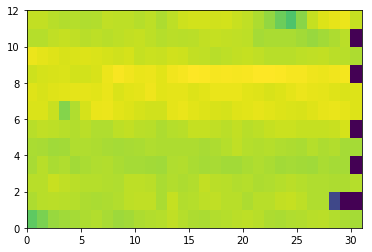

In [83]:

pl.pcolor(a)
pl.show()

In [95]:
print(births[61])

[ 2 31 77]


In [97]:
truebirths = np.cumsum(births[:, 2])
suma = truebirths[-1]

In [100]:
def truebirth():
    r = rd.randint(1, suma)
    return np.searchsorted(truebirths, r)

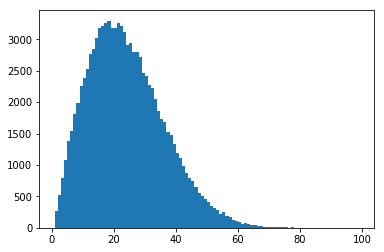

23.59792


In [102]:
def truebday(d):
    bdaylist = set()
    randbday = truebirth()
    while not randbday in bdaylist:
        bdaylist.add(randbday)
        randbday = truebirth()
    return len(bdaylist)
l = []

for i in range(N):
    temp = truebday(365)
    l.append(temp)
    
hst = pl.hist(l, range(1,100))
pl.show(hst)

print(np.mean(l))